# Practica: "Detective de Plagio con IA"
### Objetivo
Construiremos un sistema para detectar similitud entre textos utilizando diferentes representaciones y métricas.

### Pasos:
1. Cargar y preprocesar los textos.
2. Representar los textos con Bag of Words y TF-IDF.
3. Calcular similitudes usando distancia de Jaccard y coseno.
4. Determinar si hay posible plagio.

---

In [1]:
!pip install -q scikit-learn numpy
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import re

## 1️⃣ Cargar y Preprocesar los Textos

In [2]:

# He generado dos texto con IA, diciendole que inventase una noticia y a partir de ahí
# hiciera un nuevo texto muy similar
texto_1 = "La ciudad de Aurora experimentó un fenómeno inusual el pasado martes. Un objeto volador no identificado (OVNI) fue avistado sobre el parque central, generando conmoción entre los residentes. Testigos describieron una luz brillante y un objeto de forma triangular que se desplazaba a gran velocidad. Las autoridades locales aún no han emitido un comunicado oficial, pero el incidente ha desatado una ola de especulaciones en las redes sociales."
texto_2 = "Un suceso extraordinario sacudió a la población de Aurora el martes reciente. Un objeto aéreo no identificado (OANI) fue visto sobre el corazón del parque municipal, causando asombro entre los habitantes. Los presentes relataron una luminosidad intensa y una figura de tres lados que se movía rápidamente. Aunque las autoridades del municipio no han dado declaraciones, el evento ha provocado un torrente de conjeturas en las plataformas digitales."
# Preprocesamiento: convertir en minúsculas y eliminar puntuación

def minuscula_y_sin_puntuacion(texto):
    texto = texto.lower()
    return re.sub(r'[^\w\s]', '', texto)

texto_1 = minuscula_y_sin_puntuacion(texto_1)
texto_2 = minuscula_y_sin_puntuacion(texto_2)




## 2️⃣ Representación con Bag of Words y TF-IDF

Las 10 palabras más usadas en texto 1:
un: 4
de: 3
el: 3
objeto: 2
no: 2
una: 2
las: 2
la: 1
ciudad: 1
aurora: 1
Las 10 palabras más usadas en texto 2:
un: 3
de: 3
el: 3
no: 2
del: 2
los: 2
una: 2
las: 2
suceso: 1
extraordinario: 1


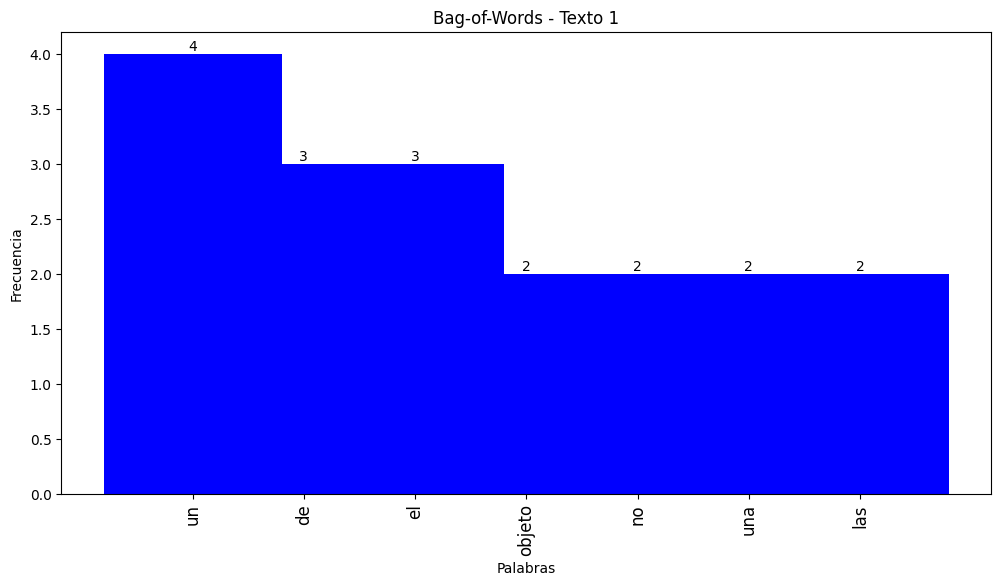

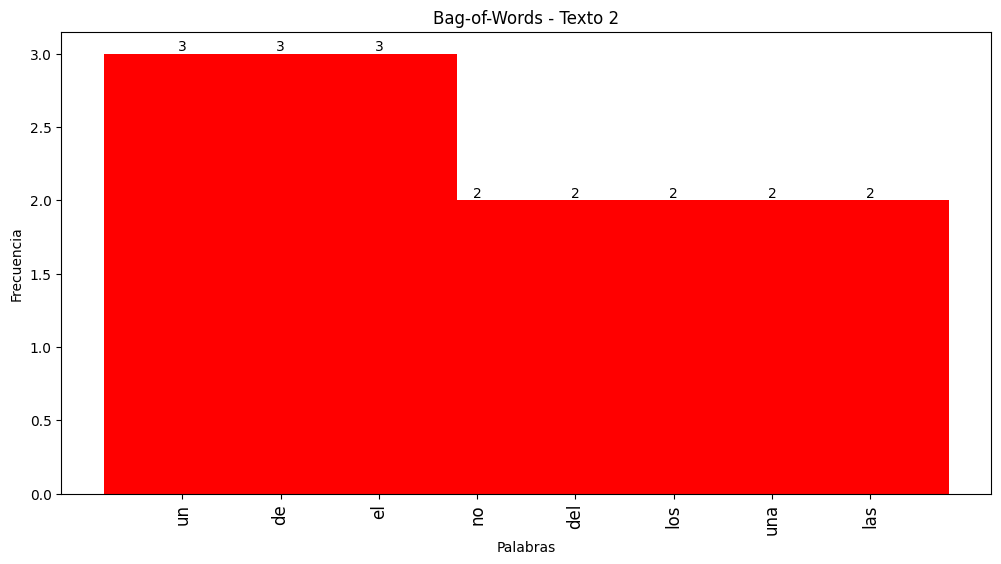

In [6]:
import matplotlib.pyplot as plt

# Bag of Words

def bag_of_words(texto):
  words = texto.split()
  return Counter(words)

bag_of_words_1 = bag_of_words(texto_1)
bag_of_words_2 = bag_of_words(texto_2)


def top_10_palabras(palabras, que_texto):

    contador = Counter(palabras)

    top_10 = contador.most_common(10)

    print(f"Las 10 palabras más usadas en {que_texto}:")
    for palabra, frecuencia in top_10:
        print(f"{palabra}: {frecuencia}")


top_10_palabras(bag_of_words_1,"texto 1")
top_10_palabras(bag_of_words_2, "texto 2")


# Filtrar palabras con frecuencia mayor que 1
filtered_words = {word: freq for word, freq in bag_of_words_1.items() if freq > 1}
filtered_words_2 = {word: freq for word, freq in bag_of_words_2.items() if freq > 1}

# Ordenar las palabras por frecuencia
sorted_words = sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)
sorted_words_2 = sorted(filtered_words_2.items(), key=lambda x: x[1], reverse=True)

# Extraer las palabras y sus frecuencias en listas separadas
words, frequencies = zip(*sorted_words)
words_2, frequencies_2 = zip(*sorted_words_2)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='blue', width=1.6)  # Ancho de la barra establecido en 1.6
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Bag-of-Words - Texto 1')
plt.xticks(rotation=90, fontsize=12)  # Hacer que las etiquetas del eje x aparezcan en vertical
plt.yticks(fontsize=10)
for i, freq in enumerate(frequencies):
    plt.text(i, freq, str(freq), ha='center', va='bottom')
plt.show()

# Crear el gráfico de barras 2
plt.figure(figsize=(12, 6))
plt.bar(words_2, frequencies_2, color='red', width=1.6)  # Ancho de la barra establecido en 1.6
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Bag-of-Words - Texto 2')
plt.xticks(rotation=90, fontsize=12)  # Hacer que las etiquetas del eje x aparezcan en vertical
plt.yticks(fontsize=10)
for i, freq in enumerate(frequencies_2):
    plt.text(i, freq, str(freq), ha='center', va='bottom')
plt.show()


In [7]:
# TF-IDF

#ya está importada la librería
#from sklearn.feature_extraction.text import TfidfVectorizer

# Crear una instancia del vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar el vectorizador a los textos y transformarlos en vectores TF-IDF
tfidf_matrix = vectorizer.fit_transform([texto_1, texto_2])

# Obtener las palabras clave (features)
feature_names = vectorizer.get_feature_names_out()

# Convertir la matriz TF-IDF a un array para facilitar la lectura
tfidf_array = tfidf_matrix.toarray()

# Imprimir los resultados
print("Palabras clave (features):", feature_names)
print("\nMatriz TF-IDF:")
print(tfidf_array)

Palabras clave (features): ['asombro' 'aunque' 'aurora' 'autoridades' 'avistado' 'aéreo' 'aún'
 'brillante' 'causando' 'central' 'ciudad' 'comunicado' 'conjeturas'
 'conmoción' 'corazón' 'dado' 'de' 'declaraciones' 'del' 'desatado'
 'describieron' 'desplazaba' 'digitales' 'el' 'emitido' 'en' 'entre'
 'especulaciones' 'evento' 'experimentó' 'extraordinario' 'fenómeno'
 'figura' 'forma' 'fue' 'generando' 'gran' 'ha' 'habitantes' 'han'
 'identificado' 'incidente' 'intensa' 'inusual' 'la' 'lados' 'las'
 'locales' 'los' 'luminosidad' 'luz' 'martes' 'movía' 'municipal'
 'municipio' 'no' 'oani' 'objeto' 'oficial' 'ola' 'ovni' 'parque' 'pasado'
 'pero' 'plataformas' 'población' 'presentes' 'provocado' 'que' 'reciente'
 'redes' 'relataron' 'residentes' 'rápidamente' 'sacudió' 'se' 'sobre'
 'sociales' 'suceso' 'testigos' 'torrente' 'tres' 'triangular' 'un' 'una'
 'velocidad' 'visto' 'volador']

Matriz TF-IDF:
[[0.         0.         0.08764314 0.08764314 0.12317937 0.
  0.12317937 0.12317937 0. 

## 3️⃣ Cálculo de Similitudes

In [8]:
# Distancia de Jaccard

from collections import Counter

def similitud_jaccard(conjunto1, conjunto2):

    # Calcular la intersección y la unión de los conjuntos
    interseccion = conjunto1.intersection(conjunto2)
    union = conjunto1.union(conjunto2)

    # Calcular la similitud de Jaccard
    if len(union) == 0:
        return 0.0  # Evitar división por cero
    else:
        similitud = len(interseccion) / len(union)
        return similitud



# Extraer conjuntos de palabras únicas
conjunto1 = set(bag_of_words_1.keys())
conjunto2 = set(bag_of_words_2.keys())

# Calcular la similitud de Jaccard
similitud_jaccard = similitud_jaccard(conjunto1, conjunto2)

# Imprimir el resultado
print("Similitud de Jaccard:", similitud_jaccard)

Similitud de Jaccard: 0.26666666666666666


In [9]:
# Similitud del Coseno

from scipy.spatial import distance
from collections import Counter


def calcular_similitud_coseno_scipy(bag_of_words_1, bag_of_words_2):
    # Obtener todas las palabras únicas
    todas_las_palabras = set(bag_of_words_1.keys()) | set(bag_of_words_2.keys())

    # Crear vectores de frecuencia
    vector1 = np.array([bag_of_words_1.get(palabra, 0) for palabra in todas_las_palabras])
    vector2 = np.array([bag_of_words_2.get(palabra, 0) for palabra in todas_las_palabras])

    # Calcular la distancia del coseno
    distancia_coseno = distance.cosine(vector1, vector2)

    # La similitud del coseno es 1 - distancia del coseno
    similitud_coseno = 1 - distancia_coseno

    return similitud_coseno



# Calcular la similitud del coseno usando scipy
similitud_coseno = calcular_similitud_coseno_scipy(bag_of_words_1, bag_of_words_2)

# Imprimir el resultado
print("Similitud del coseno (scipy):", similitud_coseno)


Similitud del coseno (scipy): 0.6327848502189877


## 4️⃣ Determinar si hay Plagio

In [10]:
# Definir un umbral de plagio

umbral_plagio = 0.5  # Por ejemplo, 0.5 (50% de similitud)

print("Similitud del coseno:", similitud_coseno)
print("Similitud de Jaccard:", similitud_jaccard)

#Me quedo con la más alta
similitud_final = similitud_coseno if similitud_jaccard > similitud_jaccard else similitud_jaccard

# Determinar si hay posible plagio
if similitud_coseno>=umbral_plagio:
    print("⚠️ Posible plagio detectado! ⚠️")
else:
    print("No hay plagio evidente.")

Similitud del coseno: 0.6327848502189877
Similitud de Jaccard: 0.26666666666666666
⚠️ Posible plagio detectado! ⚠️
